In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import bias_variance_decomp

To have a better view of the residuals vs. fitted values plot in the assignment pdf, I adjust the height and weight of each subplot, so it might not show properly in Jupyter Notebook. 

<IPython.core.display.Javascript object>


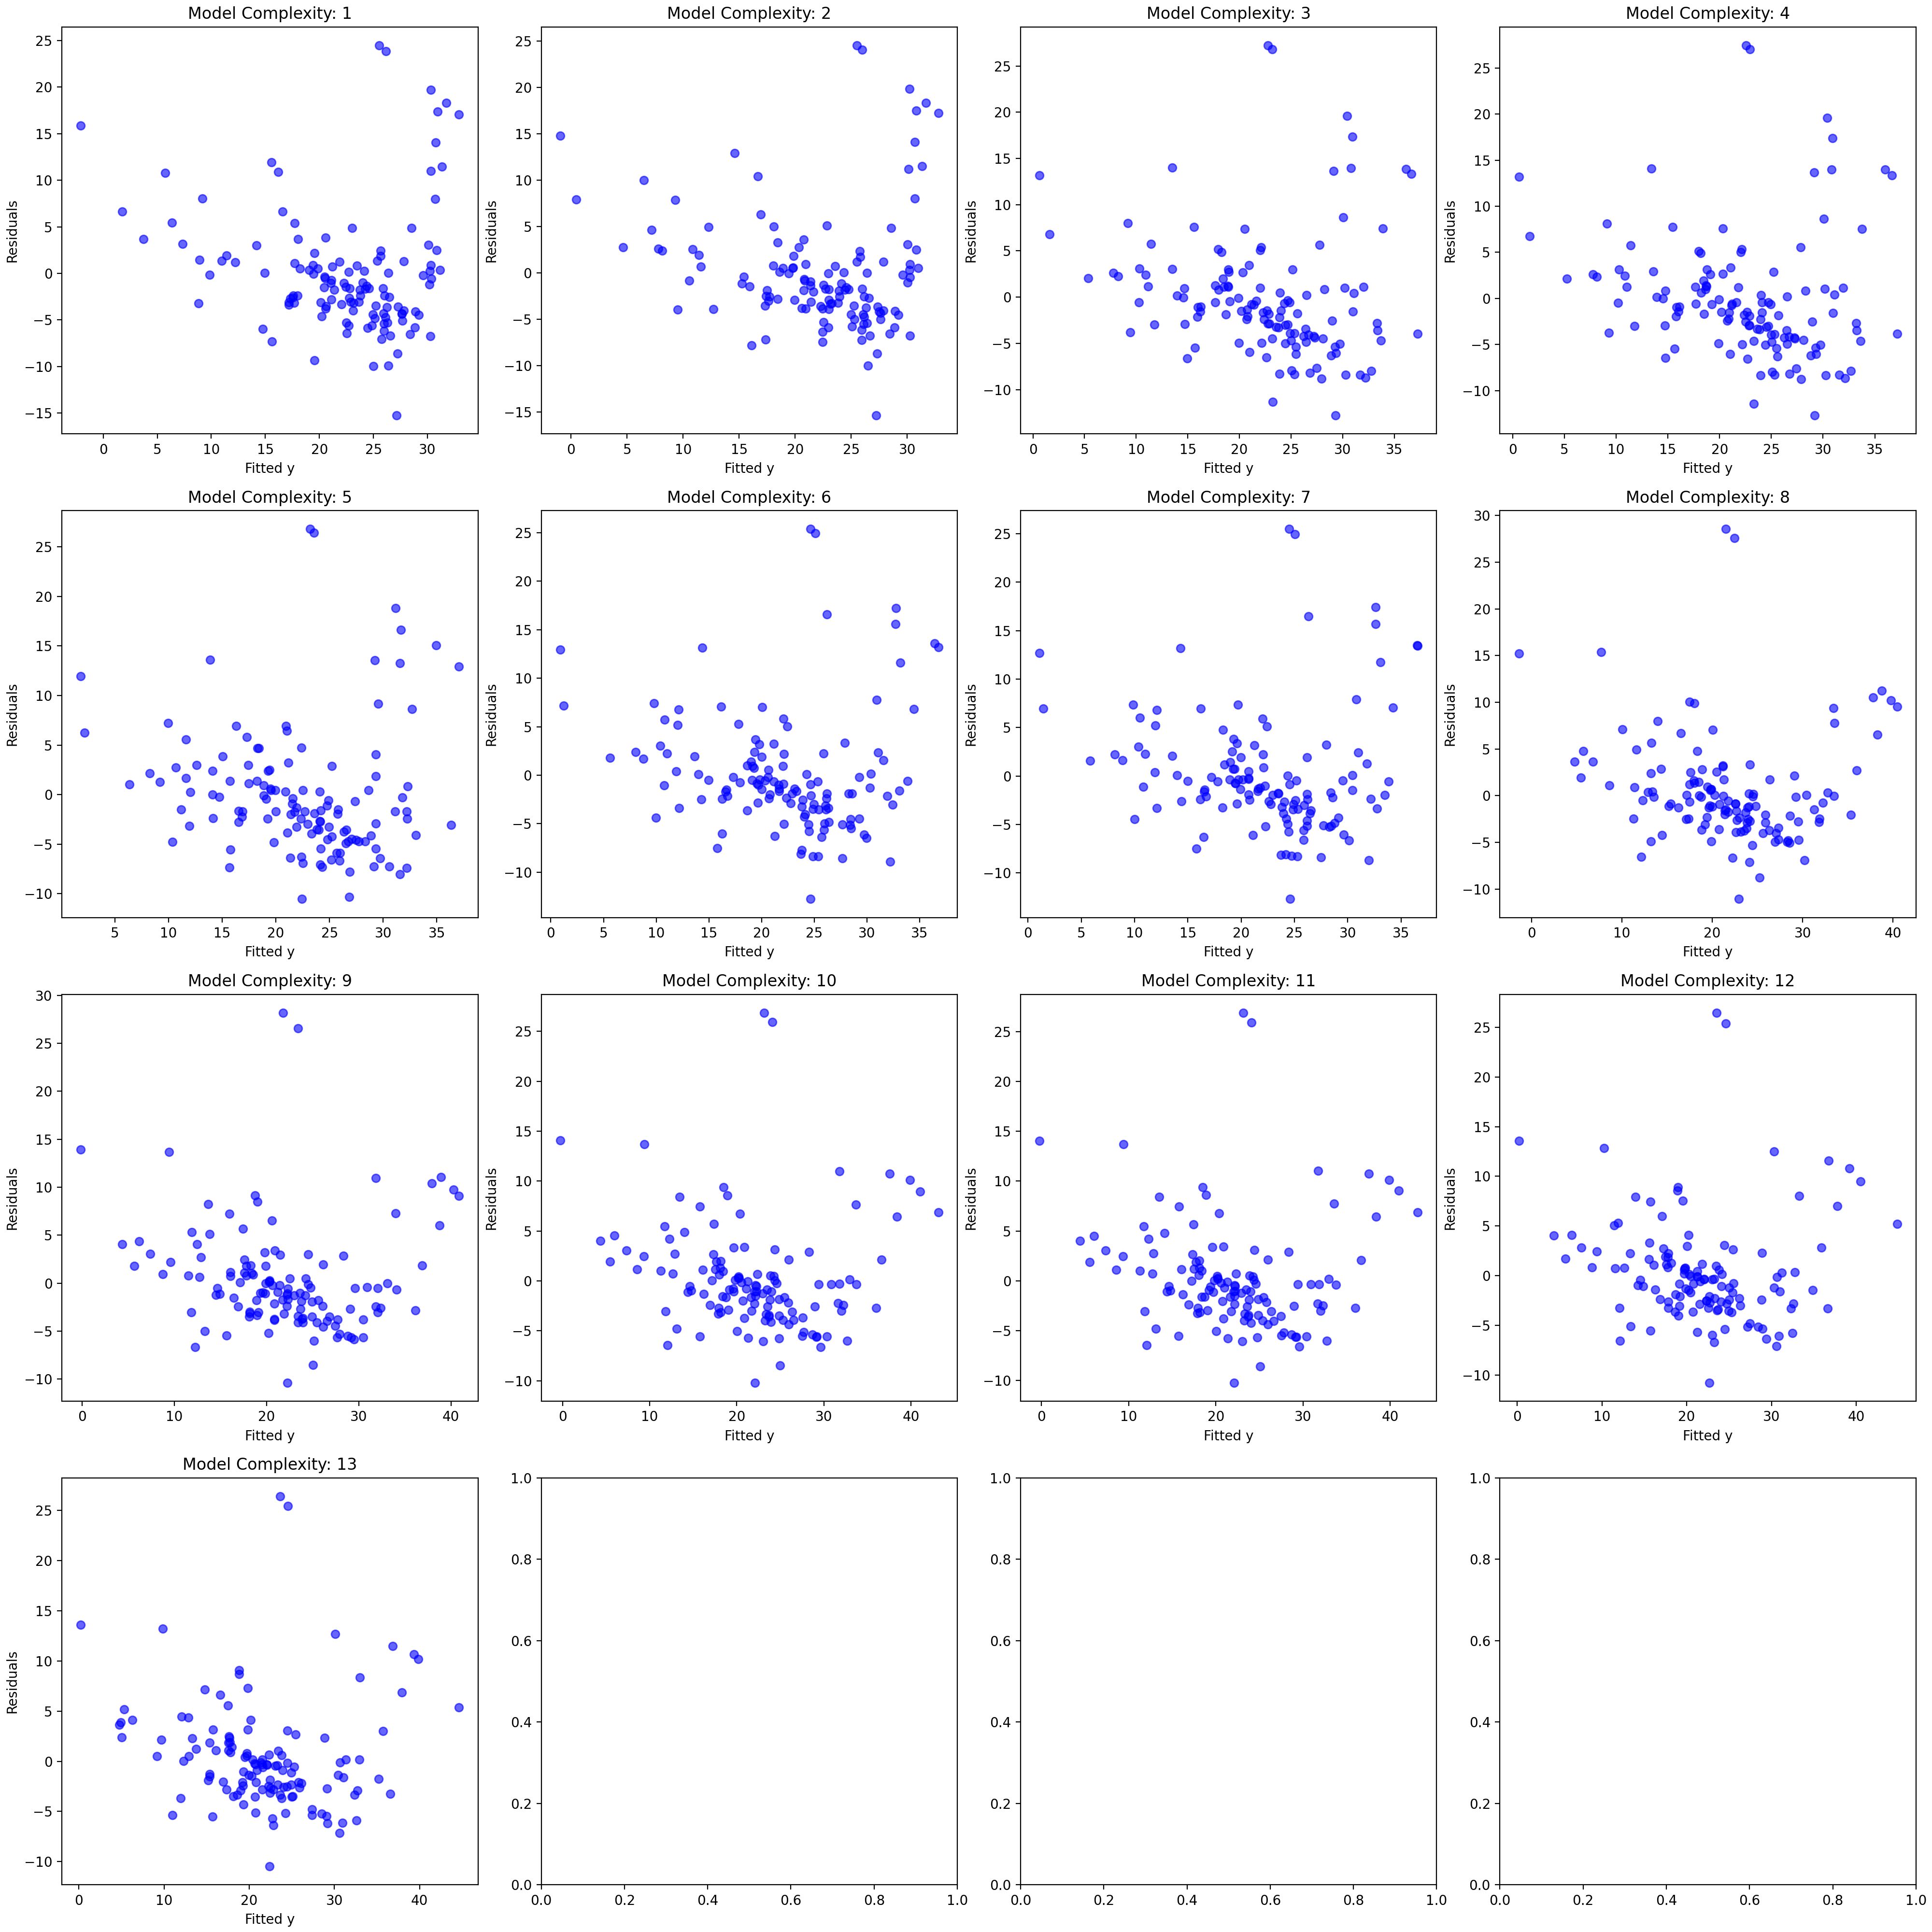

In [8]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
y = data[:, -1]
biasList = []
varList = []

fig, subaxes = plt.subplots(4, 4, figsize=(20,20))


for i,k in zip(range(12,-1, -1), range(0, 14, 1)):
    X= data[:, i:-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    linreg = LinearRegression().fit(X_train, y_train)
    y_fitted = linreg.predict(X_train)
    y_predict = linreg.predict(X_test)
    
    mse, bias, var = bias_variance_decomp(
        linreg, X_train, y_train, X_test, y_test, loss = 'mse')
    biasList.append(bias)
    varList.append(var)
    residuals = y_test - y_predict    
    

    subaxes.flat[k].plot(y_predict, residuals, 'o',  alpha=0.6, color = 'blue', label='Test Data')
    #subaxes.flat[k].plot(X_test, y_predict, '^',  alpha=0.6,color = 'red', label='Predict Data')
    #subaxes.flat[k].plot(X_train, y_train, 'o', alpha = 0.6, color = 'blue', label = 'Train Data')
    #subaxes.flat[k].plot(X_train, y_fitted, 'o', alpha = 0.6, color = 'orange', label = 'Fitted Data')
    subaxes.flat[k].set_xlabel('Fitted y')
    subaxes.flat[k].set_ylabel('Residuals')
    subaxes.flat[k].set_title('Model Complexity: {}'.format(k+1))
    #subaxes.flat[k].legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
x_num = [i for i in range(1,14)]
plt.savefig("./residuals")

From the residual plots, we could see the residuals become more close to 0, which corresponds to the assumption. 

<IPython.core.display.Javascript object>


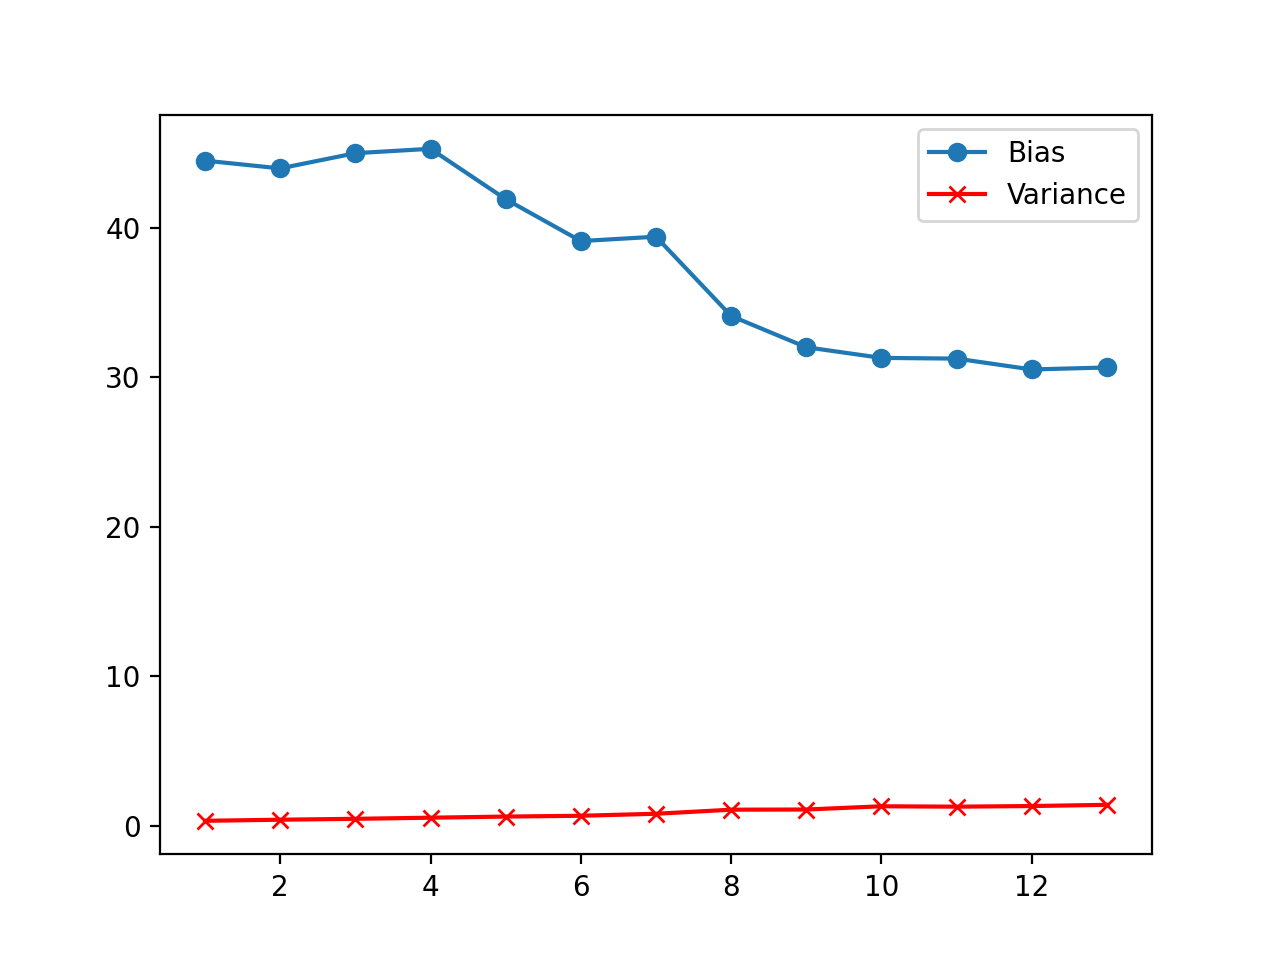

In [58]:
fig = plt.figure()
plt.plot(x_num, biasList, '-o', x_num, varList, '-xr')
plt.legend(['Bias', 'Variance'])

plt.show()

<IPython.core.display.Javascript object>


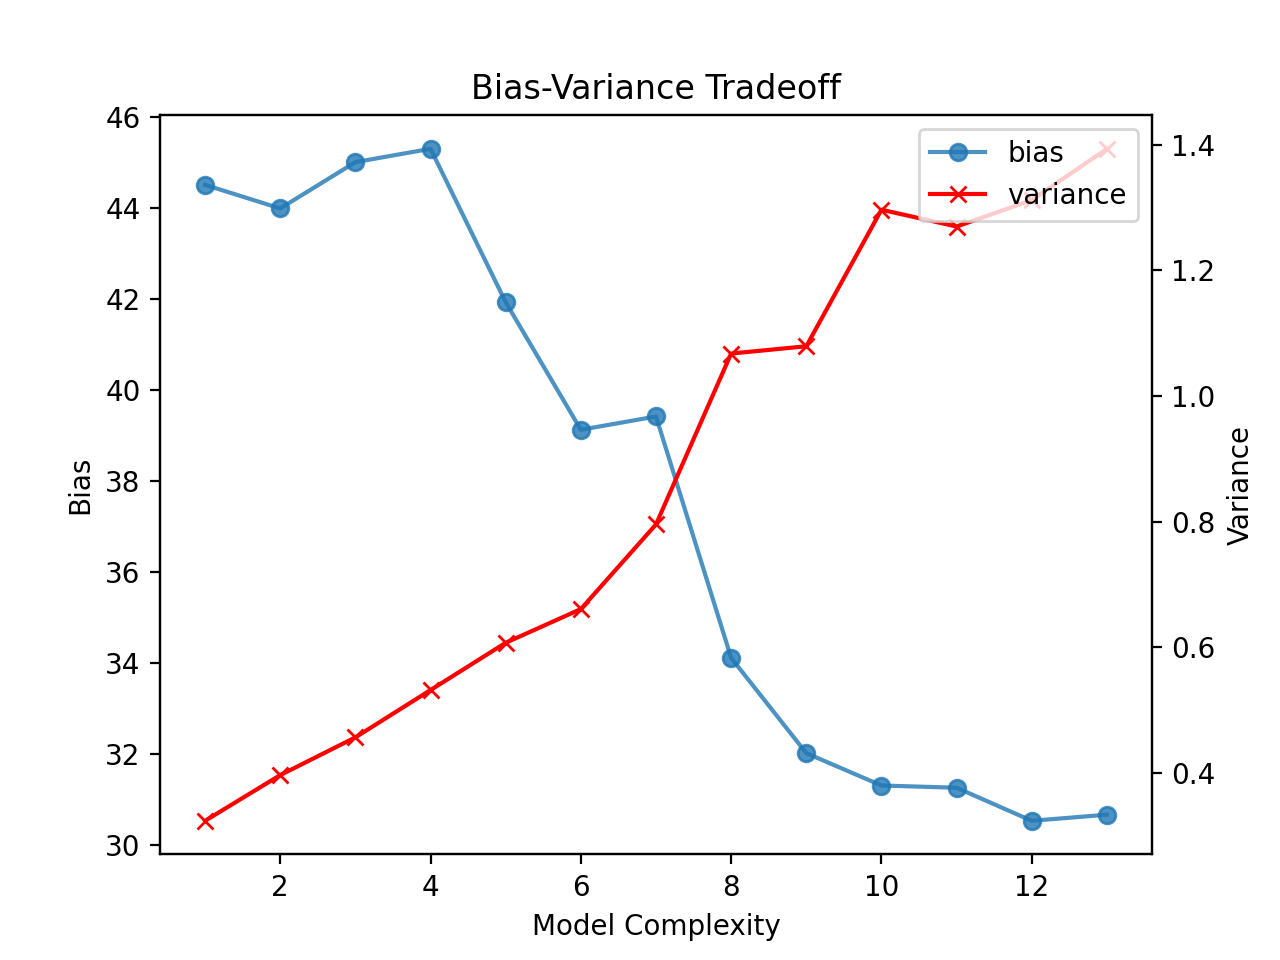

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_num, biasList, '-o',alpha=0.8, label = 'bias')
ax1.set_ylabel('Bias')
ax1.set_xlabel('Model Complexity')
ax1.set_title('Bias-Variance Tradeoff')

ax2 = ax1.twinx()
ax2.plot(x_num, varList, '-xr', label = 'variance')
ax2.set_ylabel('Variance')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

In [51]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
